In [1]:
import matplotlib.pyplot as plt
import os
from os.path import join as pjoin
import numpy as np

In [2]:
def cosine_sim(a, b):    
    n1 = np.linalg.norm(a)
    n2 = np.linalg.norm(b)
    return np.dot(a, b) / (n1 * n2)

def read_results(results_dir):
    results = []
#     p_optimal = np.array([-2, 2, -2])
    p_optimal = np.array([0, 1, 0])
    for name in os.listdir(results_dir):
        if name.find('.log') < 0:
            continue
        with open(pjoin(results_dir, name), 'r') as f:
            lines = f.readlines()
        
        res = {}
        line = list(filter(lambda l: l.find('Test set (epoch 300)') >= 0, lines))
        if len(line) < 1:
            continue
        s = line[0]
        pos1 = s.find('Acc metric')
        pos1 = pos1 + s[pos1:].find('(')
        pos2 = pos1 + s[pos1:].find('%')
        res['test_acc'] = float(s[pos1 + 1: pos2])
        pos1 = s.find('AttnAUC')
        pos1 = pos1 + s[pos1:].find('[')
        pos2 = pos1 + s[pos1:].find(']')
        res['attn_auc'] = float(s[pos1 + 2: pos2 - 1])
        line = list(filter(lambda l: l.find('p values') >= 0, lines))[0]
        pos1 = line.find('[')
        pos2 = line.find(']')
        p_values = []
        for p in line[pos1 + 1: pos2].split(' '):
            if p != '':
                p_values.append(float(p))
        p_values = np.array(p_values)
        res['cos_sim'] = cosine_sim(p_values[:-1], p_optimal)
        if res['test_acc'] > 50:
            print(name, p_values, res['cos_sim'], res['test_acc'])
        results.append(res)
    return results

292 points


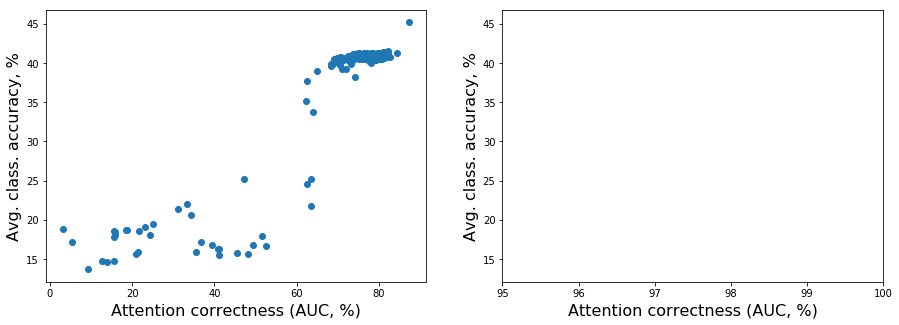

corr coef 0.9307190143723162


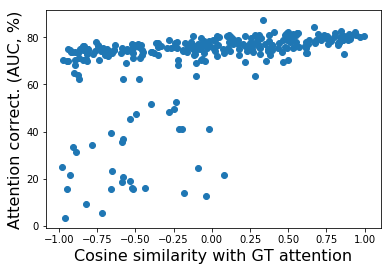

corr coef 0.4112317893837806


In [16]:
results = read_results('results/colors')
print(len(results), 'points')
plt.figure(figsize=(15,5))
plt.subplot(121)
attn_auc = np.array([r['attn_auc'] for r in results])
test_acc = np.array([r['test_acc'] for r in results])
cos_sim = np.array([r['cos_sim'] for r in results])
plt.scatter(attn_auc, test_acc)
plt.xlabel('Attention correctness (AUC, %)', fontsize=16)
plt.ylabel('Avg. class. accuracy, %', fontsize=16)
plt.subplot(122)
plt.scatter(attn_auc, test_acc)
plt.xlabel('Attention correctness (AUC, %)', fontsize=16)
plt.ylabel('Avg. class. accuracy, %', fontsize=16)
plt.xlim([95, 100])
plt.show()
print('corr coef', np.corrcoef(attn_auc, test_acc)[0, 1])
plt.scatter(cos_sim, attn_auc)
plt.xlabel('Cosine similarity with GT attention', fontsize=16)
plt.ylabel('Attention correct. (AUC, %)', fontsize=16)
plt.show()
print('corr coef', np.corrcoef(cos_sim, attn_auc)[0, 1])

seed1766.log [-8.0431819e-01  2.2637095e+00 -3.8365614e-01  1.4464847e-03] 0.9304967266139614 76.56
seed2446.log [-0.89280844  2.872057   -0.89349085 -0.3446694 ] 0.915385588991115 83.24
seed3658.log [-2.0522375  1.6561222 -1.1373515 -0.6323484] 0.576658065093741 59.12
seed9753.log [-0.240381   3.8603995 -0.3369648 -0.7808018] 0.9943008569261297 88.4
100 points


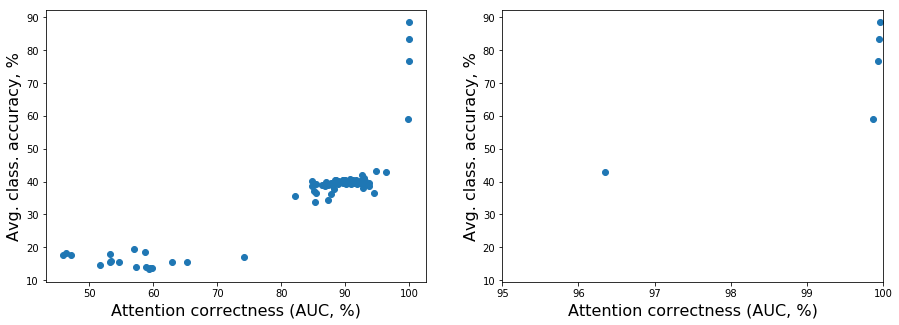

corr coef 0.8336561484347172


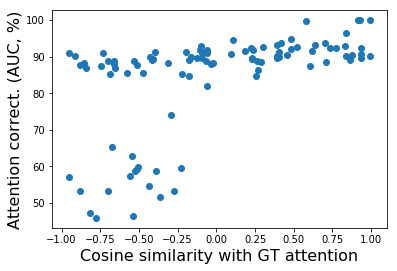

corr coef 0.5389352347755916


In [4]:
results = read_results('results/colors_no_mlp/')
print(len(results), 'points')
plt.figure(figsize=(15,5))
plt.subplot(121)
attn_auc = np.array([r['attn_auc'] for r in results])
test_acc = np.array([r['test_acc'] for r in results])
cos_sim = np.array([r['cos_sim'] for r in results])
plt.scatter(attn_auc, test_acc)
plt.xlabel('Attention correctness (AUC, %)', fontsize=16)
plt.ylabel('Avg. class. accuracy, %', fontsize=16)
plt.subplot(122)
plt.scatter(attn_auc, test_acc)
plt.xlabel('Attention correctness (AUC, %)', fontsize=16)
plt.ylabel('Avg. class. accuracy, %', fontsize=16)
plt.xlim([95, 100])
plt.show()
print('corr coef', np.corrcoef(attn_auc, test_acc)[0, 1])
plt.scatter(cos_sim, attn_auc)
plt.xlabel('Cosine similarity with GT attention', fontsize=16)
plt.ylabel('Attention correct. (AUC, %)', fontsize=16)
plt.show()
print('corr coef', np.corrcoef(cos_sim, attn_auc)[0, 1])